In [1]:
# CREATE GROMACS version 5 .gro FILE of SAM CONSITING OF 
# CARBON CHAINS WITH  CH3- AND OH- HEAD GROUPS
# C1 AND O1 AT THE SAME z-LEVEL
# CH2 and CH3 TREATED AS SINGLE MOLECULES (GROUP COORDINATES)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#!/usr/bin/env python

import numpy as np
import math
import matplotlib.pyplot as plt
import sys

In [19]:
Ncopies = 1 #number of unit cells

#next 4 lines were used to produce 25%"
Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nxoxy = 2 # number of oxygens in x-direction 
Nyoxy = 2 # number of oxygens in y-direction 

# z coordinate of first layer molecules
zPos = 21.680

# set lattice vector length
a0 = 5.0

In [20]:
# Check percentage
Percentage = int(100*Nxoxy*Nyoxy/(float(Nx*Ny)))
print "Percentage wanted is", Percentage

Percentage wanted is 4


Vx= 5.0 Vy= 0
Wx= 2.5 Wy= 4.33012701892
xincrement=  5 yincrement=  5
Checking output...
number of oxygens 4
number of carbons 100
Percentage of output=  4


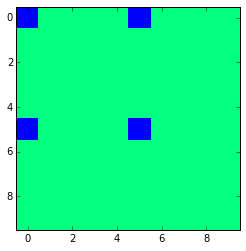

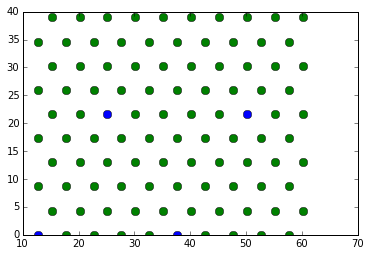

In [21]:
# make N copies of unit cell
Nx = Nx*Ncopies 
Ny = Ny*Ncopies 
Nxoxy = Nxoxy*Ncopies 
Nyoxy = Nyoxy*Ncopies 

# first basis vector V = (Vx,Vy) 
Vx = a0
Vy = 0
print "Vx=",Vx, "Vy=", Vy

# second basis vector W = (Wx,Wy)
Wx = a0*np.sin(np.pi/6)
Wy = a0*np.cos(np.pi/6)
print "Wx=",Wx, "Wy=", Wy


# create arrays to hold particle positions and types
xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
pType = np.zeros([Nx,Ny],dtype=str) # particle type
zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)


# set all particle types to 'C' (carbon)
for i in range(Nx):
  for j in range(Ny):
    pType[i,j] = 'C' 


# set particle x- and y- coordinates
for j in range(Ny):
    for i in range(Nx):
        xPos[i,j] = i*Vx + j*Wx +12.68
        yPos[i,j] = i*Vy + j*Wy 
for j in range(Ny):
    for i in range(Nx):  # Here we move the last particles of almost each line to get a more rectangular surface shape
        if xPos[i,j]>xPos[-1,1]:
           xPos[i,j] = xPos[i-Nx+1,j-2]
            
            
# exchange particles (oxygens for carbons)
#    Get indices of particles to replace:
xincrement = Nx/Nxoxy
yincrement = Ny/Nyoxy
print "xincrement= ", xincrement, "yincrement= ", yincrement
pType_boolean = np.ones([Nx,Ny],dtype=int) # array with 0 for oxygen and 1 for carbon (for plotting)
n=0
for k in range(0,Nx,xincrement):
    for l in range(0,Ny,yincrement):
        pType[k,l] = 'O'
        pType_boolean[k,l] = 0
        n = n+1
        
# Checking output
print "Checking output..."
print "number of oxygens",n
print "number of carbons", Nx*Ny
pc = n/(float(Nx)*float(Ny))
print "Percentage of output= ", int(pc*100)




#Z = np.zeros([Nx,Ny],dtype=int)
#for i in range(Nx):
#  for j in range(Ny):
#    if pType[i,j] == 'C':
#      Z[i,j] = 1

#   plot
#    first we plot the heatmap
fig, ax = plt.subplots()
ax.imshow(pType_boolean, cmap=plt.cm.winter, interpolation='nearest')
#fig.savefig('output_' + str(Percentage) + '_heatmap.pdf',format='pdf')

#    then we plot the actual positions
SizeOfDots = 8
fig, ax = plt.subplots()
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'O':
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
    else:
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
#ax.set_xlim(xPos[0,0]-0.5,xPos[-1,-1]+0.5)
#ax.set_ylim(yPos[0,0]-0.5,yPos[-1,-1]+0.5)
plt.show()
#fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')